In [1]:
#Berikut ini adalah code untuk menampilkan video live stream dari kamera 
#framenya diperkecil menjadi setengahnya
#untuk menutup frame, klik key 'q'

import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
#Berikut ini merupakan code yang menampilkan video live stream dari kamera
#kemudian anda dapat menggunakan mouse input dan membuat persegi di mana
#gambar pada persegi akan diubah menjadi citra negatif

import cv2
import numpy as np

def draw_rectangle(event, x, y, flags, params):
    global x_init, y_init, drawing, top_left_pt, bottom_right_pt
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_init, y_init = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_pt = (min(x_init, x), min(y_init, y))
            bottom_right_pt = (max(x_init, x), max(y_init, y))
            img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x] #proses mengubah jadi negatif
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_pt = (min(x_init, x), min(y_init, y))
        bottom_right_pt = (max(x_init, x), max(y_init, y))
        img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x] #proses mengubah jadi negatif

if __name__=='__main__':
    drawing = False
    top_left_pt, bottom_right_pt = (-1,-1), (-1,-1)
    
    cap = cv2.VideoCapture(0)
    
    # Check if the webcam is opened correctly
    if not cap.isOpened():
        raise IOError("Cannot open webcam")
        
    cv2.namedWindow('Webcam')
    cv2.setMouseCallback('Webcam', draw_rectangle)
    
    while True:
        ret, frame = cap.read()
        img = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        
        (x0,y0), (x1,y1) = top_left_pt, bottom_right_pt
        img[y0:y1, x0:x1] = 255 - img[y0:y1, x0:x1]
        
        cv2.imshow('Webcam', img)
        
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Tugasnya
#Silakan anda bereksperimen dengan bagian persegi yang dipilih pada video live stream dari camera
#Jika pada contoh bagian persegi diubah menjadi negatif,
#maka pada tugas ini, anda bisa berkreasi, seperti mengubah warna, apply filter seperti blur,
#gaussianblur, medianblur, atau menampilkan efek lainnya

#atau anda bisa berkreasi pada keseluruhan gambar dengan menambah facemask, kumis, 
#telinga kucing atau lainnya

In [5]:
import cv2

eye_detector = cv2.CascadeClassifier('./cascades/haarcascade_eye_tree_eyeglasses.xml')
face_detector = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_alt.xml')

mask = cv2.imread('./gambar/mask.jpg',cv2.IMREAD_UNCHANGED)

cap=cv2.VideoCapture(0)

while(cap.isOpened()):
    _,feed=cap.read()
    gray = cv2.cvtColor(feed,cv2.COLOR_BGR2GRAY)
    feed = cv2.cvtColor(feed,cv2.COLOR_BGR2BGRA)
    faces = face_detector.detectMultiScale(gray,1.1,2)
    for (x,y,w,h) in faces:
        eyes = eye_detector.detectMultiScale(gray[y:y+h,x:x+w],1.1,2)
        if len(eyes)<2:
            break
        X1 = eyes[0,0] - 50
        Y1 = eyes[0,1] - 50
        X2 = eyes[1,0] + eyes[1,2] + 50
        Y2 = eyes[1,1] + eyes[1,3] + 20
        temp = cv2.resize(mask,(X2-X1+1,Y2-Y1+1))
        for i in range(y+Y1,y+Y2+1):
            for j in range(x+X1,x+X2+1):
                if temp[i-y-Y1,j-x-X1,3] != 0:
                    feed[i,j] = temp[i-y-Y1,j-x-X1]
    cv2.imshow("MASK",feed)
    
    cv2.imwrite('gambar/hasilFilter.png', feed)
    k=cv2.waitKey(640)
    if k == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Hasil Filter')

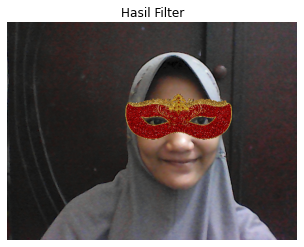

In [7]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("gambar/hasilFilter.png", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Hasil Filter")